In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.path.abspath(''), os.pardir, os.pardir, os.pardir))
sys.path.append(parent_dir)

from misc.vae import load_VAE

In [2]:
vae = load_VAE("./model")
vae

Loading model...
VAE pkl path -> 
Encoder path -> ./model/encoder_testmin.pth
Decoder path -> ./model/decoder_testmin.pth
Desc path    -> ./model/vae_desc_testmin.json


In [3]:
encoder_params = sum(param.numel() for param in vae.encoder.parameters()) 
decoder_params = sum(param.numel() for param in vae.decoder.parameters())

encoder_params + decoder_params

7269481

In [12]:
import torch

z = torch.normal(torch.zeros(vae.n_emb, 2086), torch.ones(vae.n_emb, 2086)).T
z.shape

torch.Size([2086, 32])

In [13]:
Vr = vae.decoder(z)

In [16]:
from sklearn.manifold import TSNE

In [19]:
X = TSNE().fit_transform(Vr.detach().numpy())

In [20]:
import matplotlib.pyplot as plt

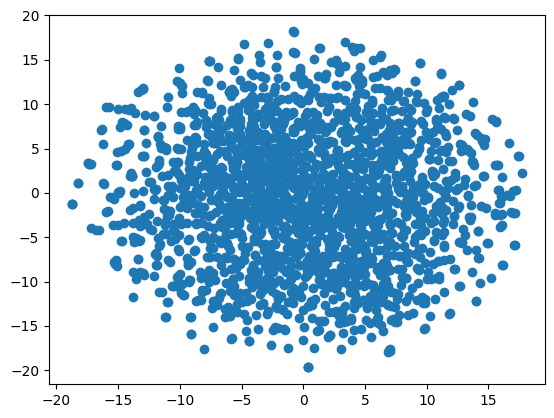

In [21]:
plt.scatter(X[:,0], X[:,1])